In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [6]:
file_path = 'data_files/insurance.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Dataset successfully loaded.")
print("Shape of the DataFrame:", df.shape)

Dataset successfully loaded.
Shape of the DataFrame: (1338, 7)


In [8]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [10]:
# Get a concise summary and check for missing values
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Note: No missing values, so This is great.

In [12]:
# descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


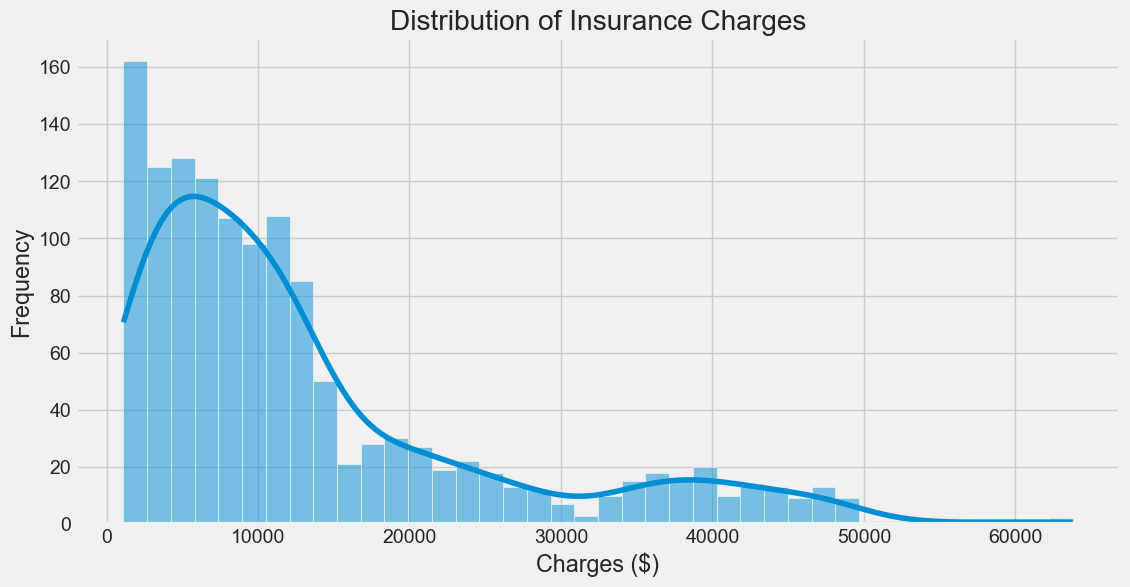

In [14]:
# Distribution of the Target Variable (Charges)
plt.figure(figsize=(12, 6))
sns.histplot(df['charges'], bins=40, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()

The distribution of charges is heavily left-skewed. Most people have lower medical costs, while a smaller number of people have very high costs. This is a common pattern in financial data.

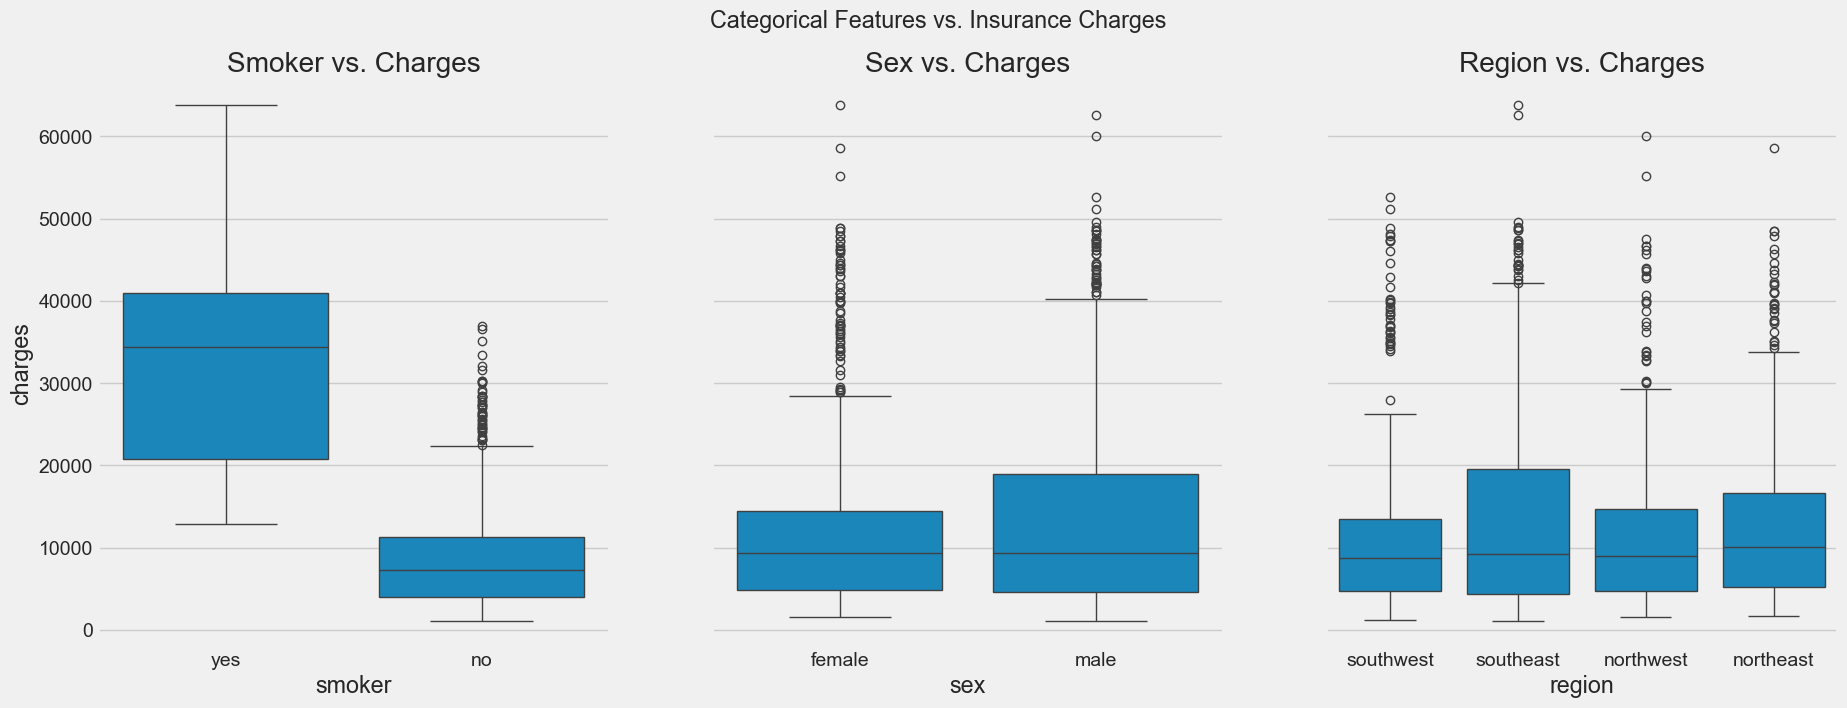

In [17]:
# Box plots are perfect for comparing distributions across categories.
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
fig.suptitle('Categorical Features vs. Insurance Charges')

# Smoker vs Charges
sns.boxplot(ax=axes[0], x='smoker', y='charges', data=df)
axes[0].set_title('Smoker vs. Charges')

# Sex vs Charges
sns.boxplot(ax=axes[1], x='sex', y='charges', data=df)
axes[1].set_title('Sex vs. Charges')

# Region vs Charges
sns.boxplot(ax=axes[2], x='region', y='charges', data=df)
axes[2].set_title('Region vs. Charges')

plt.show()

Smoker: There is a massive difference in charges between smokers and non-smokers. Smokers have significantly higher and more varied medical costs. This appears to be the most important feature by far.

Sex & Region: These features show much smaller, less distinct differences in charges.

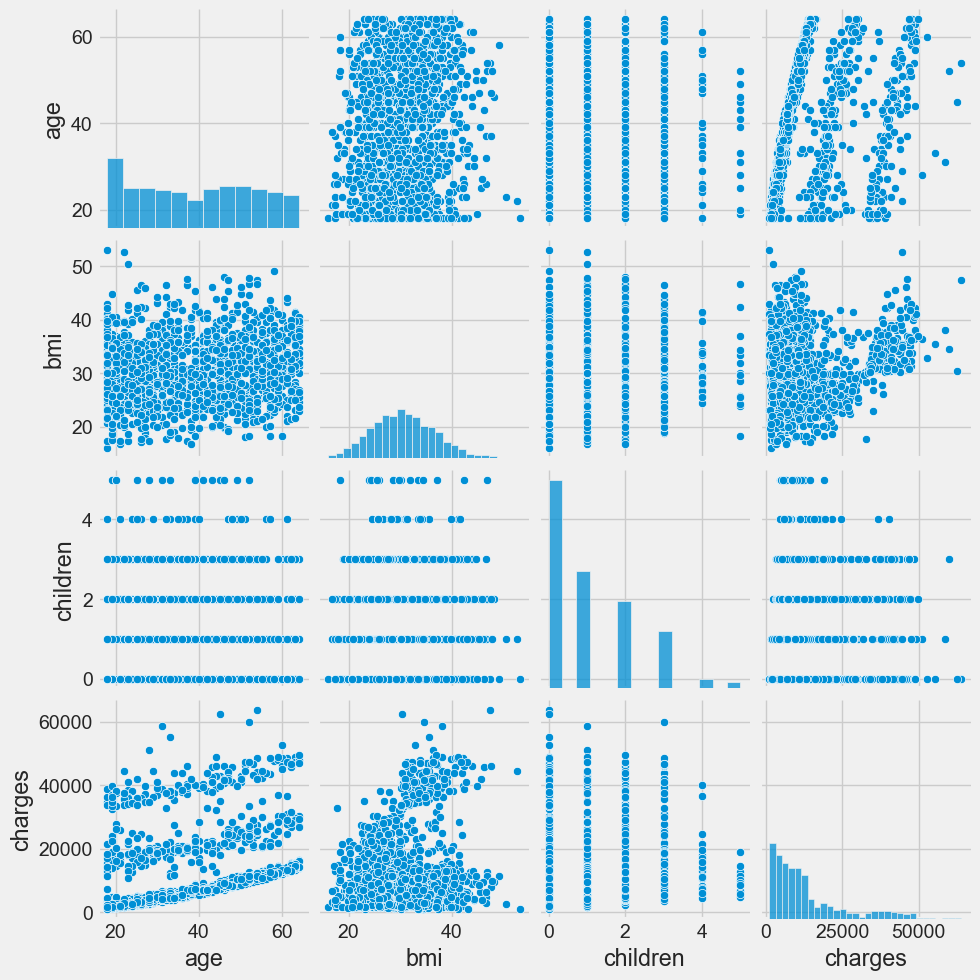

In [20]:
# Relationship between Numerical Features and Charges
# A pairplot helps visualize relationships between all numerical variables
sns.pairplot(df, height=2.5)
plt.show()

Age vs. Charges: There's a clear positive trend. As age increases, charges tend to increase. We can also see three distinct bands of data points, which are likely separated by smoker status.

BMI vs. Charges: The relationship is less clear, but there seems to be a cluster of individuals with high BMI and high charges.

In [23]:
# Convert Categorical Features to Numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# drop_first=True avoids multicollinearity by dropping one category per feature

In [25]:
print("DataFrame after One-Hot Encoding:")
print(df_encoded.head())

DataFrame after One-Hot Encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [27]:
# 2. Define Features (X) and Target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
# Identify numerical columns to scale (age, bmi, children)
numerical_cols = ['age', 'bmi', 'children']


In [31]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) # Only transform

print("\nTraining data scaled successfully.")


Training data scaled successfully.


In [33]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [35]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [37]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): $4,181.19
Mean Squared Error (MSE): $33,596,915.85
R-squared (R²): 0.78


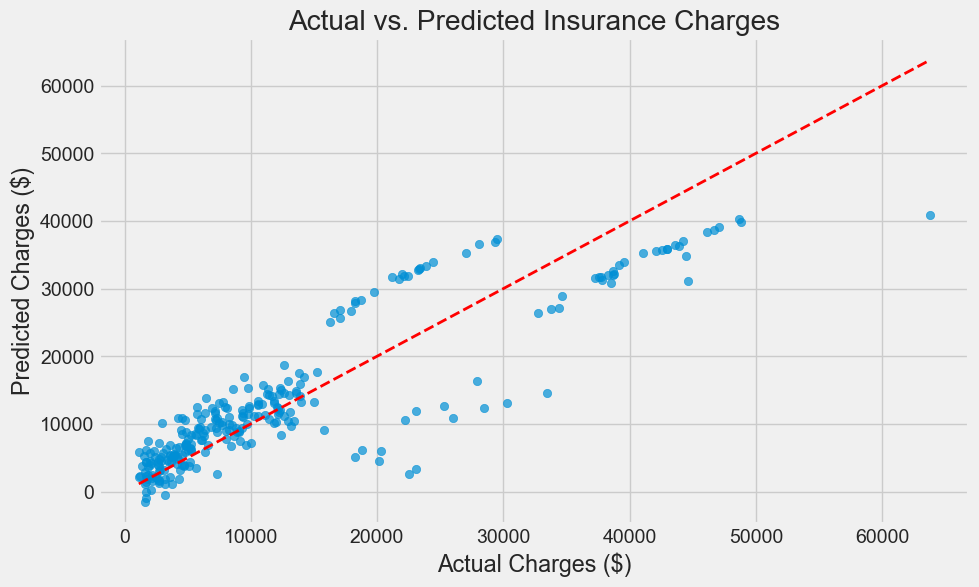

In [39]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges ($)")
plt.ylabel("Predicted Charges ($)")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()

An $R^2$ of approximately 0.78 is a very strong result! This means our model can explain about 78% of the variability in medical charges using the features we provided. The MAE tells us that, on average, our model's predictions are off by about $4,180.

In [42]:
# Create a DataFrame to view the coefficients
coeffs = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coeffs.sort_values(by='Coefficient', ascending=False))

                   Coefficient
smoker_yes        23651.128856
age                3614.975415
bmi                2036.228123
children            516.890247
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


Most Important Feature: The coefficient for smoker_yes is overwhelmingly large (around 23,600). This means that, all other factors being equal, 
the model predicts a smoker's costs to be over $23,000 higher than a non-smoker's. This confirms our EDA finding and is a powerful, actionable insight.

Other Key Factors: age and bmi also have significant positive coefficients, indicating that costs increase with age and body mass index.

Model Performance: The model performs very well, capturing a significant portion of the variance in charges. This demonstrates that a relatively simple linear model can be highly effective when the right features are included and properly processed.